In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = "/content/drive/MyDrive/Tomato_leafs/plant disease"

In [3]:
train_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/train'

In [4]:
test_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/valid'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [6]:
traindata=train.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1555 images belonging to 5 classes.


In [7]:
testdata=test.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 473 images belonging to 5 classes.


In [ ]:
#import tensorflow as tf
#from tensorflow.keras.layers import Dense, Flatten, Activation,Softmax 
#from tensorflow.keras.applications.vgg16 import VGG16
#vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

#model = tf.keras.Sequential([
 #   vgg16,
 #   Flatten(),
 #   Dense(1024, activation='relu'),
    #Dense(512, activation='relu'),
    #Dense(5, activation='softmax') # replace 5 with the number of your output classes
#])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [9]:
def vgg16(input_shape=(128, 128, 3), num_classes=5):
    model = tf.keras.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 4
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 5
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
    model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
    model.add(tf.keras.layers.Dense(units=5, activation='softmax'))
    

    return model

In [10]:
har=vgg16(input_shape=(128, 128, 3), num_classes=5)

In [11]:
har.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

In [12]:
har.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
var=har.fit(traindata,validation_data=testdata,epochs=5,batch_size=2)

Epoch 1/5
49/49 [==============================] - 1061s 21s/step - loss: 1.6179 - accuracy: 0.2186 - val_loss: 1.6035 - val_accuracy: 0.2093
Epoch 2/5
49/49 [==============================] - 14s 294ms/step - loss: 1.6052 - accuracy: 0.2289 - val_loss: 1.6044 - val_accuracy: 0.2093
Epoch 3/5
49/49 [==============================] - 14s 293ms/step - loss: 1.6049 - accuracy: 0.2289 - val_loss: 1.6072 - val_accuracy: 0.2093
Epoch 4/5
49/49 [==============================] - 14s 291ms/step - loss: 1.6058 - accuracy: 0.2141 - val_loss: 1.6061 - val_accuracy: 0.2093
Epoch 5/5
49/49 [==============================] - 14s 288ms/step - loss: 1.6047 - accuracy: 0.2289 - val_loss: 1.6043 - val_accuracy: 0.2093


In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(var.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.617949,0.218650,1.603471,0.209302
1,1.605241,0.228939,1.604372,0.209302
2,1.604895,0.228939,1.607227,0.209302
3,1.605810,0.214148,1.606106,0.209302
4,1.604707,0.228939,1.604317,0.209302


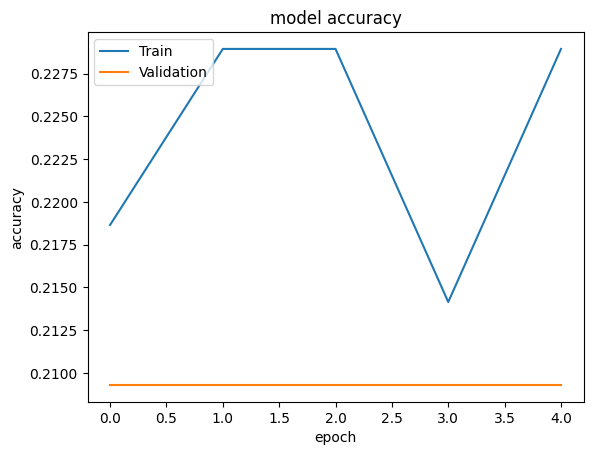

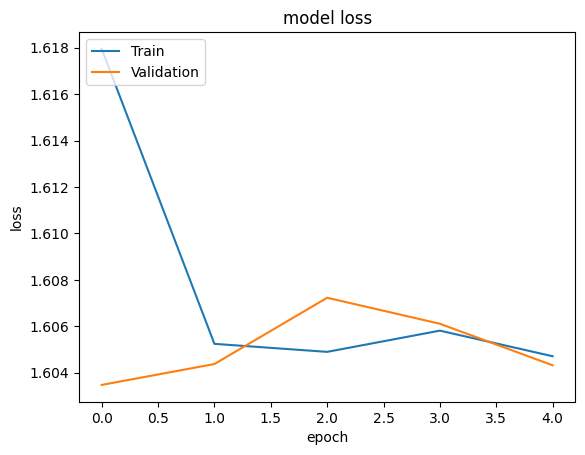

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(var.history['accuracy'])
plt.plot(var.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(var.history['loss'])
plt.plot(var.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

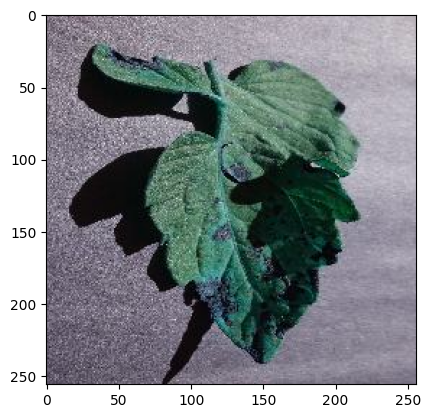

In [18]:
import cv2

t=cv2.imread('/content/drive/MyDrive/tomato_disease/plant disease/valid/Tomato___Early_blight/d41e78aa-0020-457b-a17d-736d426adad5___RS_Erly.B 7755_flipTB.JPG')
plt.imshow(t)

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=har.predict(h)
classnames=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 1s 658ms/step


'Tomato___Late_blight'